In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/krishnaik06/Stock-MArket-Forecasting/master/AAPL.csv")
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [3]:
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [4]:
df1 = df.reset_index()['close']
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

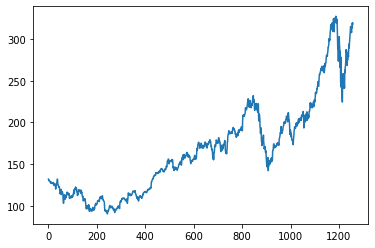

In [5]:
plt.plot(df1)

In [6]:
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# convert in the array and also reshape 1D to 2D 
df1 = np.array(df1).reshape(-1 , 1)
df1 = scaler.fit_transform(df1)

In [8]:
df1

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

In [9]:
# splitting dataset into train test split 

training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size
train_data , test_data = df1[0:training_size,:],df1[training_size:len(df1),:]

In [10]:
training_size,test_size


(817, 441)

In [11]:
train_data[:5],test_data[:5]


(array([[0.17607447],
        [0.17495567],
        [0.16862282],
        [0.1696994 ],
        [0.16727181]]), array([[0.52651355],
        [0.52837119],
        [0.53119986],
        [0.53871485],
        [0.5461454 ]]))

In [12]:
# convert an array of values into a dataset matrix in form of x , y
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)


In [13]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [14]:
print(X_train.shape), print(y_train.shape)


(716, 100)
(716,)


(None, None)

In [15]:
print(X_test.shape), print(ytest.shape)


(340, 100)
(340,)


(None, None)

In [16]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [27]:
y_train.shape


(716,)

In [17]:
#  create the stacked LSTM model

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [18]:
model = Sequential()
model.add(LSTM(50, return_sequences=True , input_shape=(100,1)))
model.add(LSTM(50 , return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error' , optimizer = 'adam')

In [19]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
12/12 [==============================] - 13s 253ms/step - loss: 0.0201 - val_loss: 0.0546
Epoch 2/100
12/12 [==============================] - 0s 39ms/step - loss: 0.0036 - val_loss: 0.0045
Epoch 3/100
12/12 [==============================] - 0s 33ms/step - loss: 0.0013 - val_loss: 0.0041
Epoch 4/100
12/12 [==============================] - 0s 33ms/step - loss: 7.7421e-04 - val_loss: 0.0054
Epoch 5/100
12/12 [==============================] - 1s 44ms/step - loss: 6.5738e-04 - val_loss: 0.0067
Epoch 6/100
12/12 [==============================] - 0s 40ms/step - loss: 6.4414e-04 - val_loss: 0.0055
Epoch 7/100
12/12 [==============================] - 0s 30ms/step - loss: 6.7691e-04 - val_loss: 0.0046
Epoch 8/100
12/12 [==============================] - 0s 31ms/step - loss: 6.1015e-04 - val_loss: 0.0054
Epoch 9/100
12/12 [==============================] - 0s 30ms/step - loss: 6.1029e-04 - val_loss: 0.0047
Epoch 10/100
12/12 [==============================] - 0s 31ms/step - loss:

In [21]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


In [33]:
train_predict[0]

array([112.55539], dtype=float32)

In [22]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)


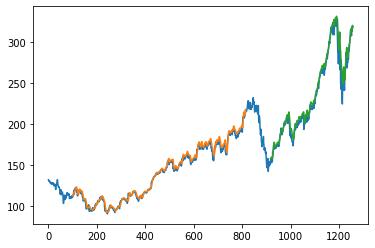

In [23]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [24]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 100)

In [25]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
